## Progetto Machine Learning: Autorship
***direttive iniziali:*** Scegliamo di usare il kernel offerto da Anaconda perchè, rispetto a quello installato quando scarichiamo direttamente python, 
ha già tutte le librerie di cui abbiamo bisogno. Premi in alto a destra e seleziona il kernel di Jupyter. Se esegui:

import sys

print(sys.executable)

dovrebbe stampare: "c:\Users\Utente\anaconda3\python.exe"

## Analisi del dataset
Prendiamo i dati dal CSV e analizziamo come si distribuiscono i testi nelle varie classi. Dall'istogramma del dataset si può notare che alcuni autori non hanno nessun item associato (**da gestire**). 
Il test set è stato campionato dal dataset completo, il training set è costituito dalla restante parte del dataset.

Dataset di training:



,text,author
0,ou have time to listen i will give you the ent...,1
1,wish for solitude he was twenty years of age a...,1
2,and the skirt blew in perfect freedom about th...,1
3,of san and the rows of shops opposite impresse...,1
4,an hour s walk was as tiresome as three in a s...,1
...,...,...
53673,after surrounding and searching the whole plac...,50
53674,giant who could make a young earthquake or a w...,50
53675,waters of the lake at the bottom of the hill c...,50
53676,fingers and thumb in it exactly as it came out...,50


Classi presenti nel training set  : [1, 2, 3, 4, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 50]
Classi normalizzate               : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
Numero di classi nel training set : 45


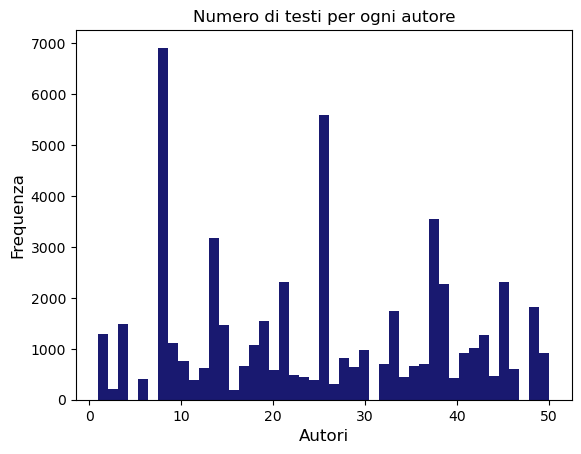

In [19]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

file = "C:\\Users\\Utente\\Desktop\\ML\\materiale\\Gungor_2018_VictorianAuthorAttribution_data-train.csv"
df   = pd.read_csv(file, delimiter=',',  encoding='latin-1')
print("Dataset di training:\n")
display(df)


classes       = [x for x in df['author'].unique()]
authors       = len(classes)
classes_norm  = [x for x in range (1,authors+1)]
# test_dim      = 100
# dft           = df.sample(test_dim)
# df            = df.drop(dft.index)

print("Classi presenti nel training set  : {}".format(classes))
print("Classi normalizzate               : {}".format(classes_norm))
print("Numero di classi nel training set : {}".format(authors))


# Istogramma
authors_array = df['author'].to_numpy()
plt.hist(authors_array, bins=authors, color='midnightblue')
plt.xlabel('Autori', fontsize=12)
plt.ylabel('Frequenza',fontsize=12)
plt.title('Numero di testi per ogni autore')
plt.show()

## Creazione del test set e riduzione del training set
La riduzione di istanze del training set è necessaria a causa di problemi computazionali. Lasciando il dataset con oltre 50.000 istanze, ad esempio, la funzione obiettivo poteva essere migliorata solo con 10 iterazioni. Sfruttiamo la funzione train_test_split per entrambi i compiti da svolgere:
* per prima cosa riduciamo la dimensionalità dell'intero dataset, campionando autore per autore in modo da lasciare inalterata la proporzione di elementi nelle classi. Come possiamo vedere, l'istogramma risultante è identico al precedente a meno di un fattore di scala.
* estraiamo il testset calcolando la dimensione in base al dataset ridotto. Nel nostro caso prendiamo il 33%. L'estrazione è fatta, in questo caso, randomicamente perchè non vogliamo mantenere i pattern che si vedono nel dataset. Questo potrerebbe a overfitting.

,text,author
649,can follow do you think he has entirely gotten...,1
761,ve come over to say he asked a little later as...,1
545,made her teeth chatter though it was a warm da...,1
367,hand and an officer demanded in no gentle voic...,1
361,any way mr told him his usual dignity that he ...,1
...,...,...
53095,will you must go in to your own room raise the...,50
52874,i have had occasion to remark while upon this ...,50
52938,with eyes turned upward and her mind absent an...,50
53656,day li day ay far an near her fame as a d the ...,50


,text,author
47506,the song had destroyed its character as an hon...,43
36897,was only to be happy and to draw knowledge fro...,35
12262,of of many of the men had almost expired it wa...,11
41424,have fought against mine and how came you here...,38
3041,looked oh your on this subject as the common c...,6
...,...,...
50854,and hurried down the stairs wondering when the...,46
33836,the horses starting off with their heads in th...,30
36962,of it among tolerably virtuous and comfortable...,35
14432,of which still even after the was not tlie mom...,14


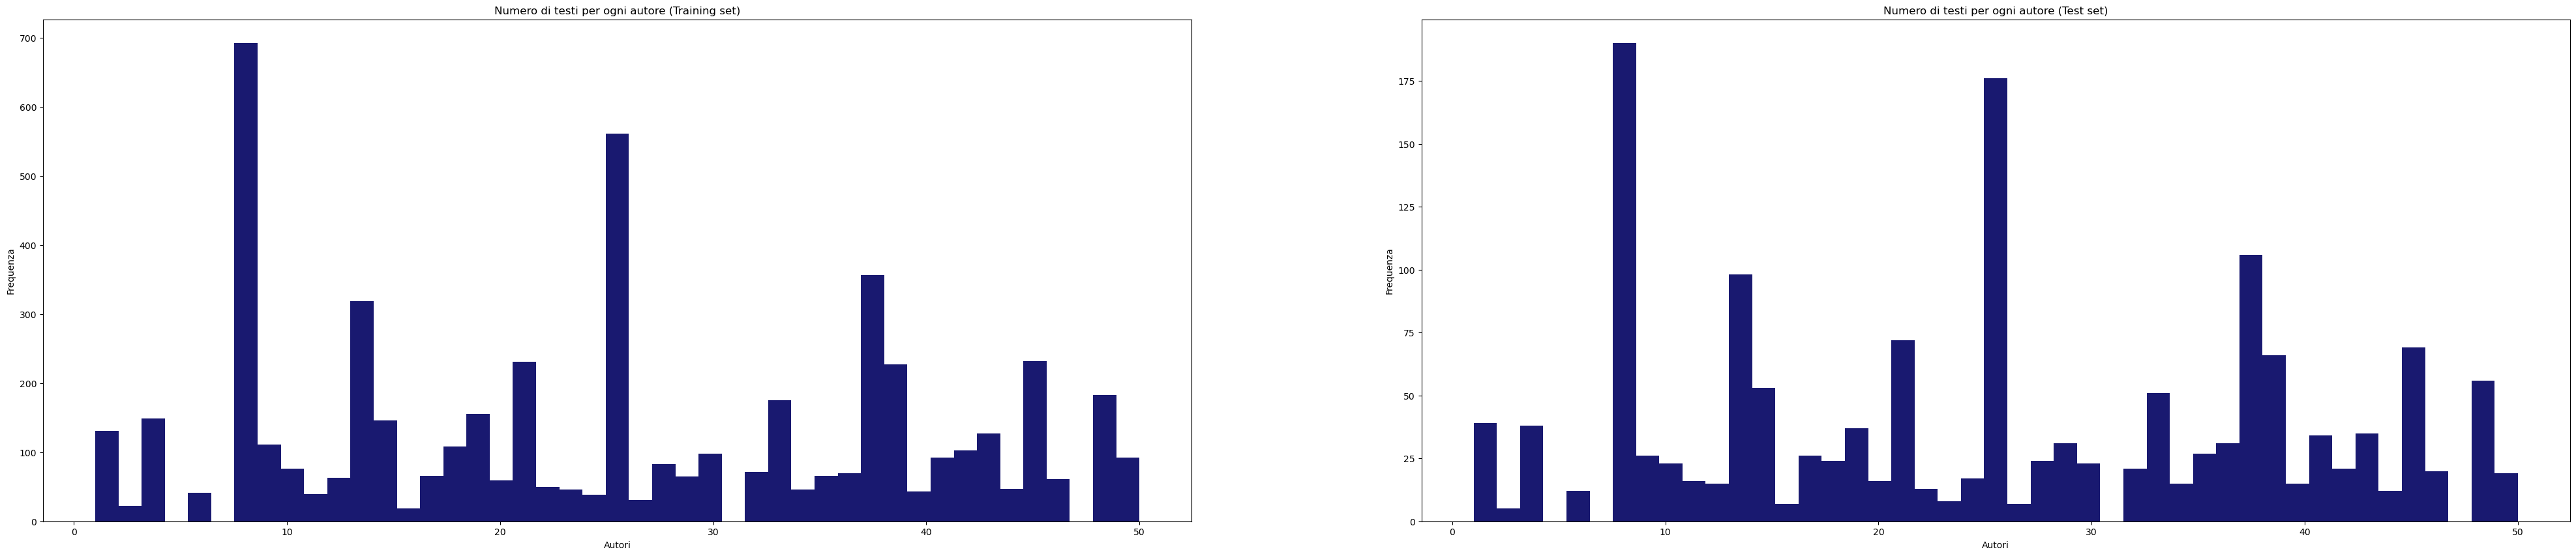

In [20]:
from sklearn.model_selection import train_test_split


small_df     = pd.DataFrame()
res_df       = pd.DataFrame()
percentage   = 0.10
percentage_t = percentage * 0.33


# RIDUZIONE TRAINING SET
for author in classes:
    df_author    = df.loc[df.author == author]
    res, small = train_test_split(df_author, test_size=percentage, random_state=42)
    small_df     = pd.concat([small_df, small])
    res_df       = pd.concat([res_df, res])

display(small_df)


# ESTRAZIONE TEST SET
_, small_dft = train_test_split(res_df, test_size=percentage_t, random_state=20, stratify=None)
display(small_dft)


# ISTOGRAMMI
fig, axes = plt.subplots(1, 2, figsize=(50, 10))
axes[0].hist(small_df.author.to_numpy(), bins=authors, color='midnightblue')
axes[0].set(xlabel='Autori', ylabel='Frequenza', title='Numero di testi per ogni autore (Training set)')

# cambiare in questo modo se vogliamo un po' di randomicità in più
# small_dft = dft = res_df.sample(int(len(small_df)*0.33))

axes[1].hist(small_dft.author.to_numpy(), bins=authors, color='midnightblue')
axes[1].set(xlabel='Autori', ylabel='Frequenza', title='Numero di testi per ogni autore (Test set)')

plt.show()


df            = small_df
dft           = small_dft
global_corpus = df.text.to_numpy()
test_corpus   = dft.text.to_numpy()



## Preprocessamento dei dati
I testi sono stati trasformati in una rappresentazione VETTORIALE. Per prima cosa i corpus vengono *lemmatizzati* per raggruppare parole semanticamente equivalenti. Infine viene creato il modello di linguaggio per ogni classe (autore) che, in questo modo, viene descritta da un vettore di occorrenze di termini.

In [21]:
# import nltk
# nltk.download('wordnet')
# nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer


# Funzione per la lemmatizzazione di un testo in formato stringa

def lemmatize_text(text, lemmatizer):
    tokens            = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)



# Creazione della distribuzione delle parole per i vari autori

lemmatizer = WordNetLemmatizer()
vectorizer = CountVectorizer(stop_words='english', lowercase=True)


lemmatized_data      = [lemmatize_text(text, lemmatizer) for text in global_corpus]
lemmatized_data_test = [lemmatize_text(text, lemmatizer) for text in test_corpus]

X_train = vectorizer.fit_transform(lemmatized_data)
y_train = df.author
X_test  = vectorizer.transform(lemmatized_data_test)
y_test  = dft.author

print(X_train.shape)  

(5390, 8428)


# Riduzione di dimensionalità
Non è possibile utilizzare PCA in quanto il dataset è rappresentato con una matrice sparsa. Utilizziamo una sua approssimazione.

Come possiamo notare dal grafico la varianza sembra ben distribuita su tutte le componenti e, putrtoppo, la riduzione di dimensionalità non riesca a ridurre notevolmente la dimensione dello spazio delle feature. Comunque possiamo accontentarci della varianza catturata da 2000 feature. Il dataset inziale aveva oltre 8000 feature!

In [ ]:
from sklearn.decomposition import TruncatedSVD

num_pc = 2000
svd = TruncatedSVD(n_components=num_pc, n_iter=7, random_state=42)
print("creata la SVD")
svd.fit(X_train)
print("fit fatta")
# print("varianza dei primi {} autovalori: {}".format(num_pc, svd.explained_variance_ratio_))
X_transformed = svd.transform(X_train)
variance_ratio_cumulative = np.cumsum(svd.explained_variance_ratio_)

# Traccia il grafico
plt.plot(range(1, len(variance_ratio_cumulative) + 1), variance_ratio_cumulative, marker='o')
plt.xlabel('Numero di componenti')
plt.ylabel('Varianza cumulata')
plt.title('Varianza cumulata al variare delle componenti principali')
plt.grid(True)
plt.show()

In [ ]:
print("X_transformed shape: {}\n".format(X_transformed.shape))
print("y_train shape      : {}\n".format(y_train.shape))
X_train = X_transformed
X_test = svd.transform(X_test)

# SVM
La SVM non converge se le classi non sono linearmente separabili dunque si è scelto di testare questo modello con la variante softmargin. L'iperparametro C serve per la regolarizzazione e più decresce più stiamo alleggerendo il peso degli errori dello specifico dataset. Per imparare il miglior valore di C è stata eseguita una cross validation.
La cross validation divide il dataset in k insiemi che vengono considerati in ordine come singoli test set contro i k-1 training set restanti. La media delle prestazioni sulle singole iterazioni è una buona stima delle prestazioni del modello allenato su tutto il training set.

Dato che vogliamo allontaraci dalla soluzione hardmargin SVM proviamo per valori di C molto piccoli. Infatti, si nota che, con $C$ appartenente a $[0.1,1)$ le prestazioni del modello rimangono stazionarie e inefficienti. Dunque, si è deciso di esplorare l'intervallo $(0,0.1)$.

## FA CAGARE

**CONSIDERAZIONI:** Impostando a 10 il numero massimo di iterazioni il modello su tutto il training set viene addestrato in poco più di 1 minuto. Ci fermiamo qui a causa di limitazioni computazionali. In realtà potremmo cercare qual è il valore dopo cui smette di migliorare.

In [ ]:
# CROSS VALIDATION PER VEDERE QUALE VALORE DI MAX_ITER VA INSERITO

decision_function_shape = 'ovr'
max_iter = 100

kernel = "linear"
degree = 7
gamma = 0.7



mean_scores = []
max_values = np.arange(50, 101, 25)
i = 1
# DA RIESEGUIRE
for max in max_values:
    print("{}) max_iter = {}\n".format(i, max))
    svm_model = svm.SVC(C=0.01, max_iter=max, degree=degree, kernel=kernel, gamma=gamma, decision_function_shape=decision_function_shape)
    scores = cross_val_score(svm_model, X_train, y_train, cv=5,scoring='f1_micro')
    mean_scores.append(np.mean(scores))
    i = i + 1


print("Mean Scores:", mean_scores)
print(mean_scores[0])
plt.scatter(max_values, mean_scores)
plt.xlabel('Valori di mac_iter')
plt.ylabel('Mean Scores')
plt.title('Risultati della Cross-Validation al variare di C')
plt.show()





c:\Users\Utente\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


score del modello (training): 1.0

score del modello (test)    : 0.8613550815558344

calcolate le predizioni per il training set

calcolate le predizioni per il test set

calcolata la matrice di confusione per il training set



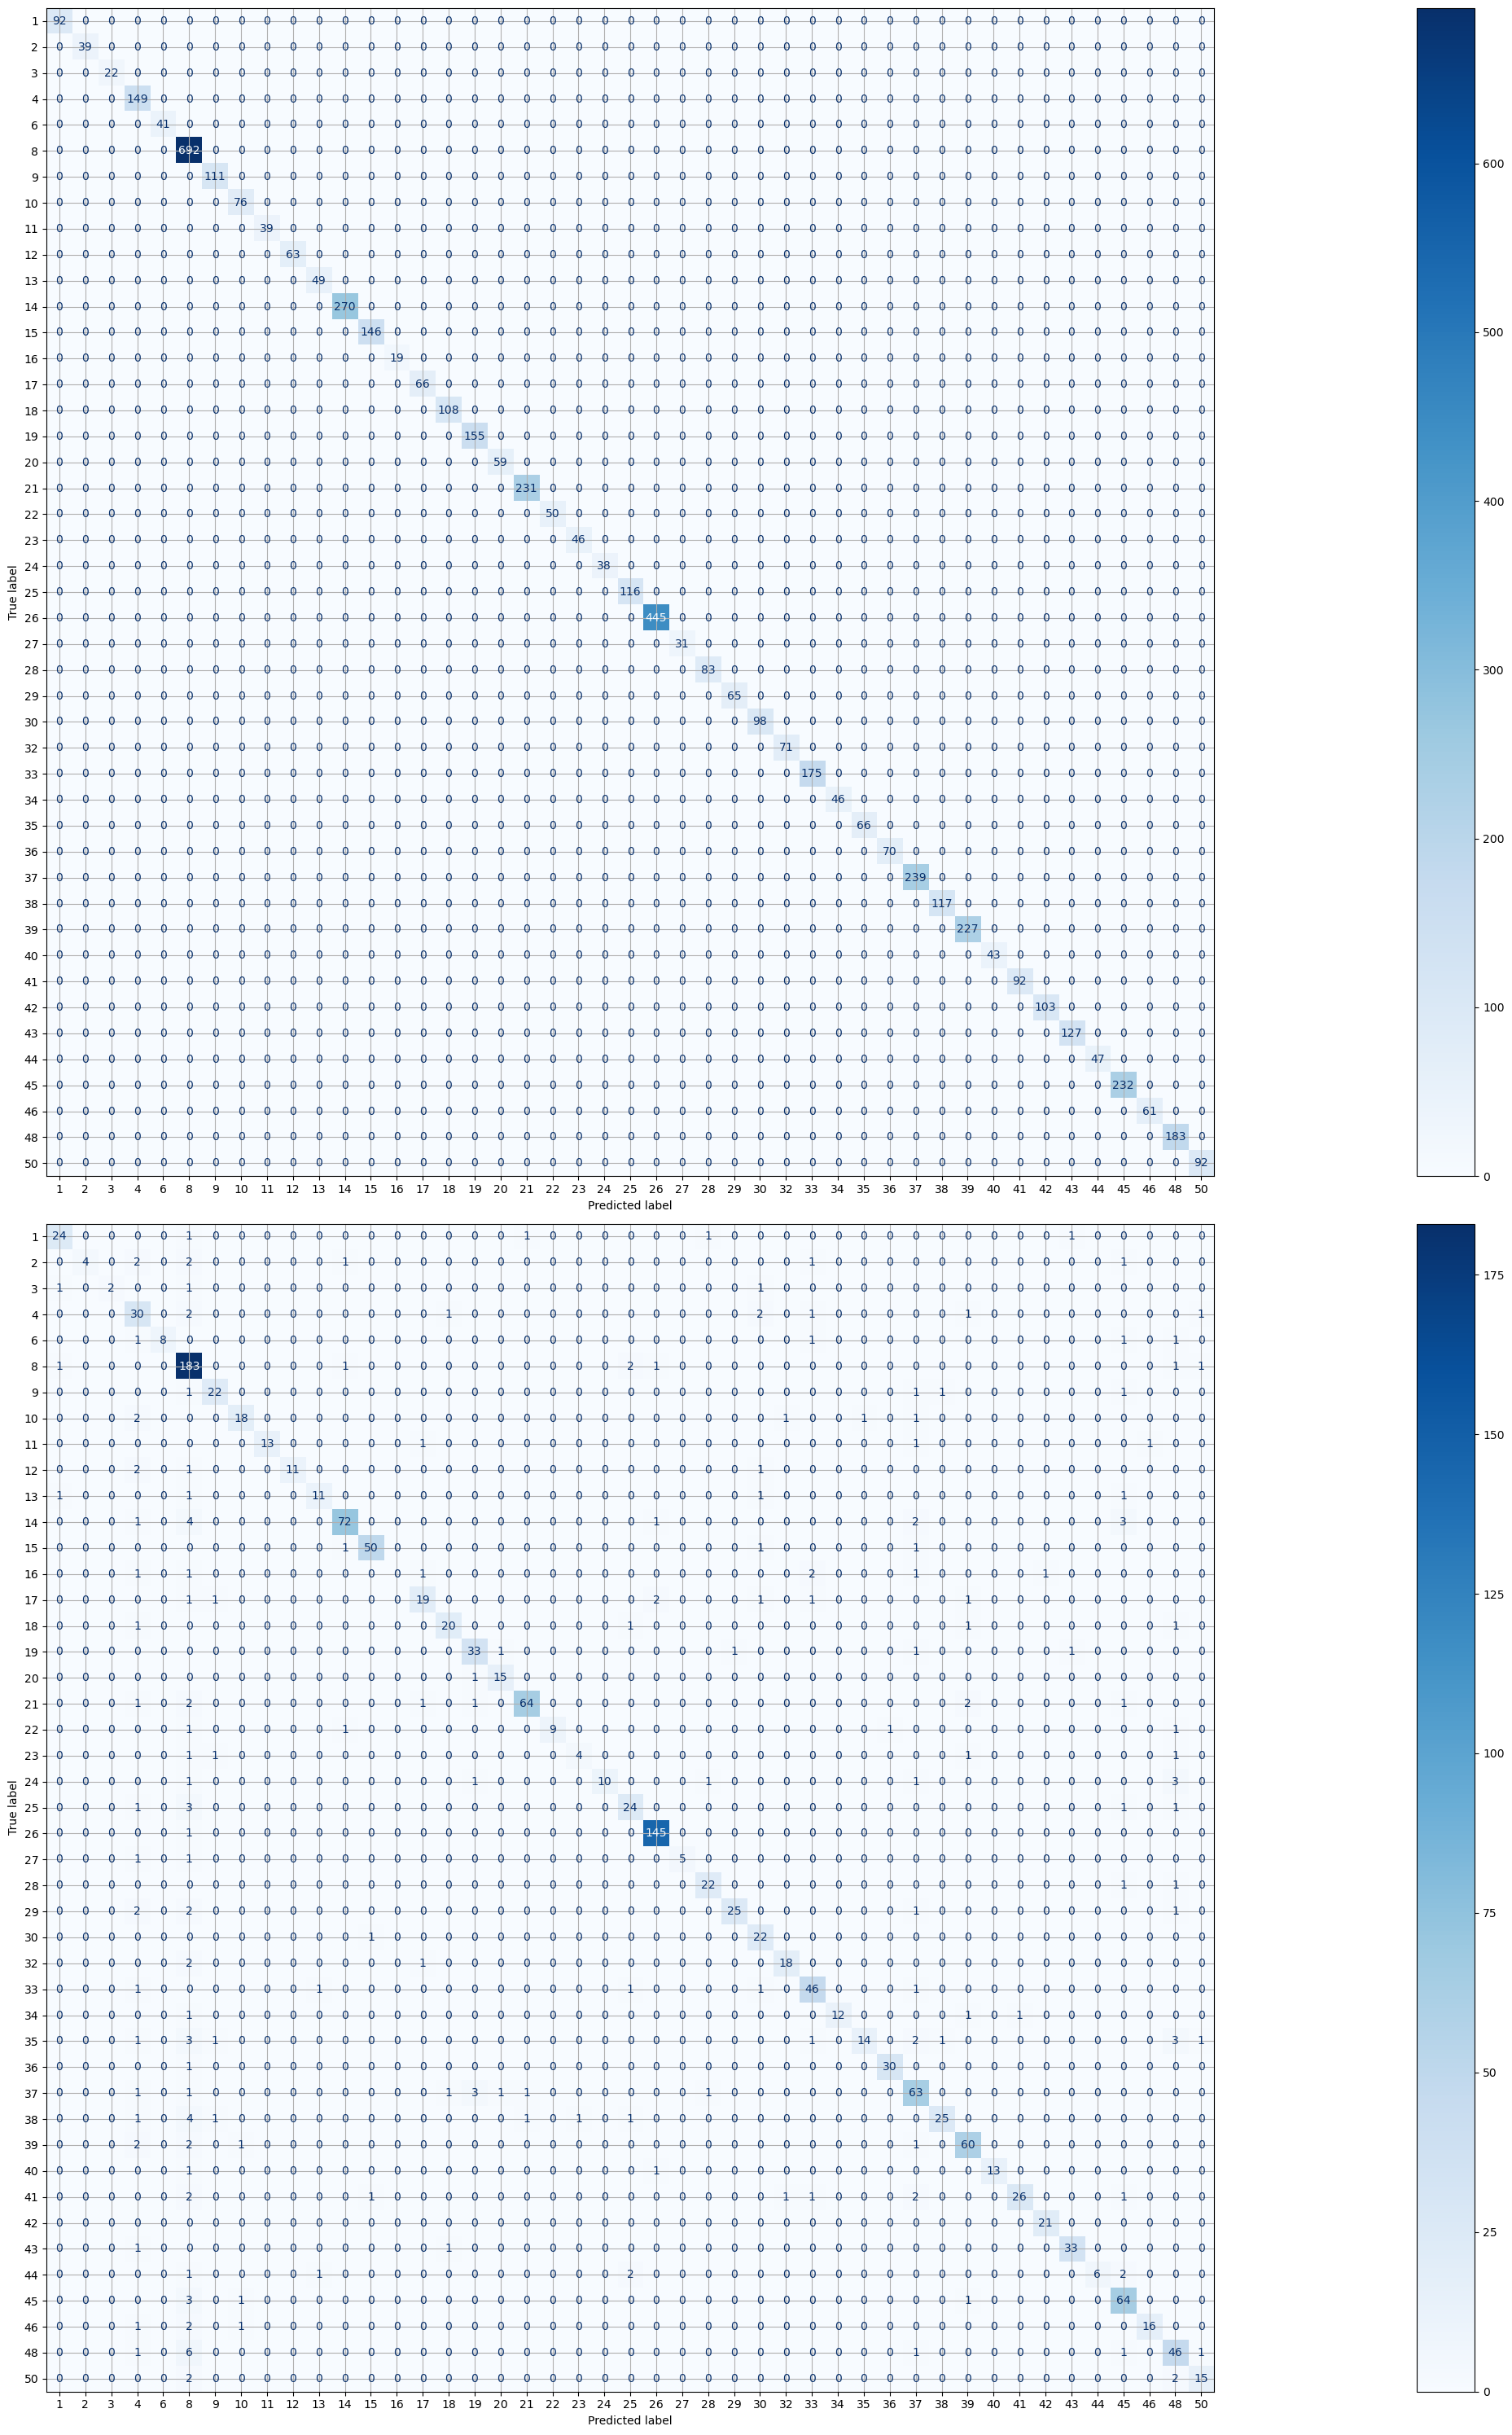

In [22]:
# ADDESTRAMENTO DEL MODELLO FINALE E MATRICE DI CONFUSIONE
import matplotlib.cm as cm

decision_function_shape = 'ovr'
max_iter = 100

kernel = "linear"
degree = 7
gamma = 0.7

svm_model = svm.SVC(C=0.01, max_iter=max_iter, degree=degree, kernel=kernel, gamma=gamma, decision_function_shape=decision_function_shape)
svm_model.fit(X_train, y_train)
score     = svm_model.score(X_train, y_train)
score_t   = svm_model.score(X_test, y_test)
print("score del modello (training): {}\n".format(score))
print("score del modello (test)    : {}\n".format(score_t))

predicted   = svm_model.predict(X_train)
print("calcolate le predizioni per il training set\n")
predicted_t = svm_model.predict(X_test)
print("calcolate le predizioni per il test set\n")
cm_train    = confusion_matrix(y_train, predicted, labels=svm_model.classes_)
print("calcolata la matrice di confusione per il training set\n")
cm_test     = confusion_matrix(y_test, predicted_t, labels=svm_model.classes_)



fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(50, 30))
disp            = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=svm_model.classes_)
disp_t          = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=svm_model.classes_)
disp.plot(ax=ax1, cmap=plt.cm.Blues)
disp_t.plot(ax=ax2, cmap=plt.cm.Blues)
ax1.grid(None) 
ax2.grid(None) 

plt.tight_layout()
plt.show()







# SOFTMAX REGRESSION
In corso

Assume la distribuzione del target come categorica. Il parametro $p_i$ della distribuzione è calcolato come una softmax $s(\textbf{w} \textbf{x}_i)$

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif


# regularization is applied by default
max = 100
softmax = LogisticRegression(C=0.9, max_iter=max)
softmax.fit(X_train, y_train)

# y   = softmax.predict(X_train)
# y_t = softmax.predict(X_test)
score   = softmax.score(X_train, y_train)
score_t = softmax.score(X_test, y_test)
print("score train {} - score test {}\n".format(score, score_t))

# y_prob   = softmax.predict_proba(X_train)
# print(y_prob)





score train 1.0 - score test 0.8877038895859473



c:\Users\Utente\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# NAIVE BAYES

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha=1.0e-9)
clf.fit(X_train, y_train.ravel())

MultinomialNB(alpha=1e-09)

Grafici per Prior $p(C_i)$, Likelihood $p(t_j|C_i)$, Evidenza $p(t_j)$ e Posterior $p(C_i|t_j)$

In [25]:
# distribuzione a priori e likelihood p(t_j|C_i)
prior=np.exp(clf.class_log_prior_)
lik=np.exp(clf.feature_log_prob_)

# calcolo dell'evidenza
def sumAllClasses(t_i):
    sum = 0
    for c_k in range(0,authors):
        sum += lik[c_k,t_i]*prior[c_k]
    return sum

evid=np.array(
    [sumAllClasses(term_i) for term_i in range(lik.shape[1])]
    )
print(lik.shape)
print(evid.shape)

# da graficare, da calcolare posterior


(45, 8428)
(8428,)


Calcolo dell'accuracy sul test set, ho fatto un plot di prova, può essere tolto che non ha molto senso

Accuracy = 0.4353827


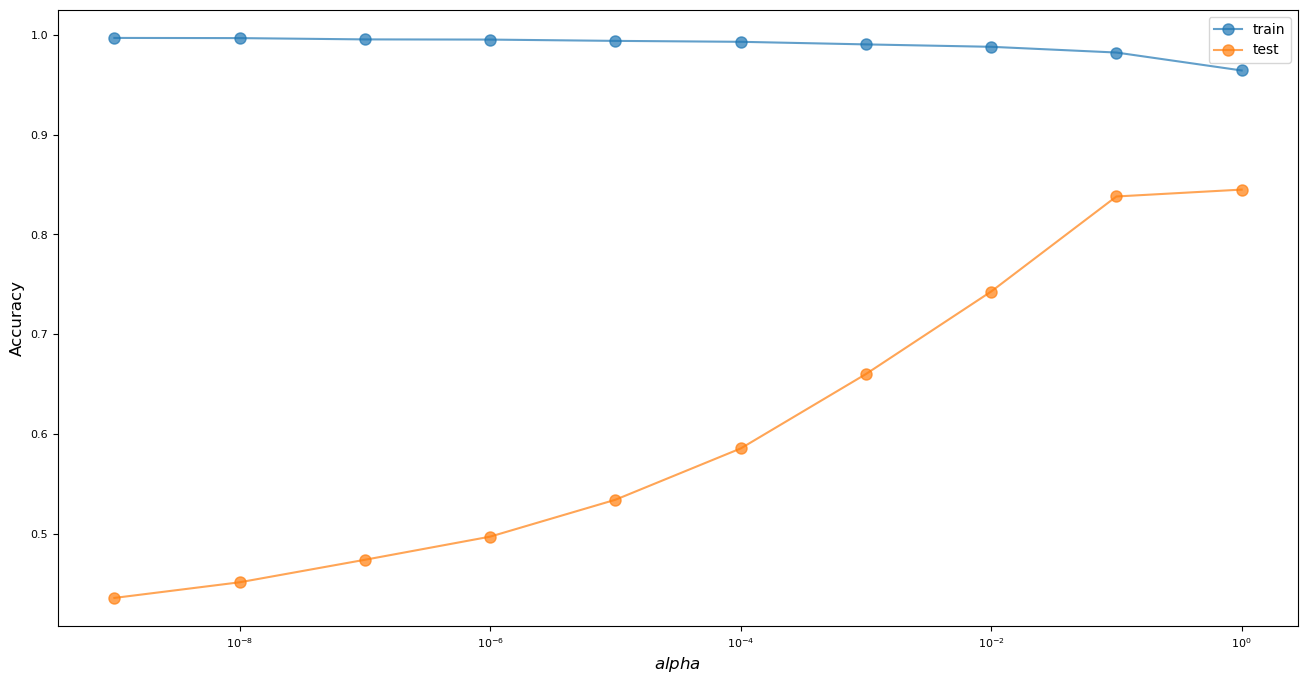

In [26]:
preds = clf.predict(X_test)
print('Accuracy = {0:8.7f}'.format(accuracy_score(y_test, preds)))

alphas = [1.0e-9, 1.0e-8, 1.0e-7, 1.0e-6, 1.0e-5, 1.0e-4, 1.0e-3, 1.0e-2, 1.0e-1, 1.0]
train_errs = []
test_errs = []
for a in alphas:
    clf = MultinomialNB(alpha=a)
    clf.fit(X_train, y_train.ravel())
    preds_train = clf.predict(X_train)
    preds_test  = clf.predict(X_test)
    train_errs.append(accuracy_score(y_train, preds_train))
    test_errs.append(accuracy_score(y_test, preds_test))

fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.tick_params(axis='both', which='major', labelsize=8)
ax.plot(alphas, train_errs, '-o', markersize=8, alpha=.7, label='train')
ax.plot(alphas, test_errs, '-o', markersize=8, alpha=.7, label='test')
plt.legend(fontsize=10)
plt.xlabel('$alpha$', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xscale("log")
plt.show()

[0.4035250463821892, 0.41929499072356213, 0.4346938775510204, 0.45862708719851575, 0.48515769944341375, 0.5280148423005565, 0.5853432282003711, 0.6799628942486085, 0.79721706864564, 0.7946196660482375]


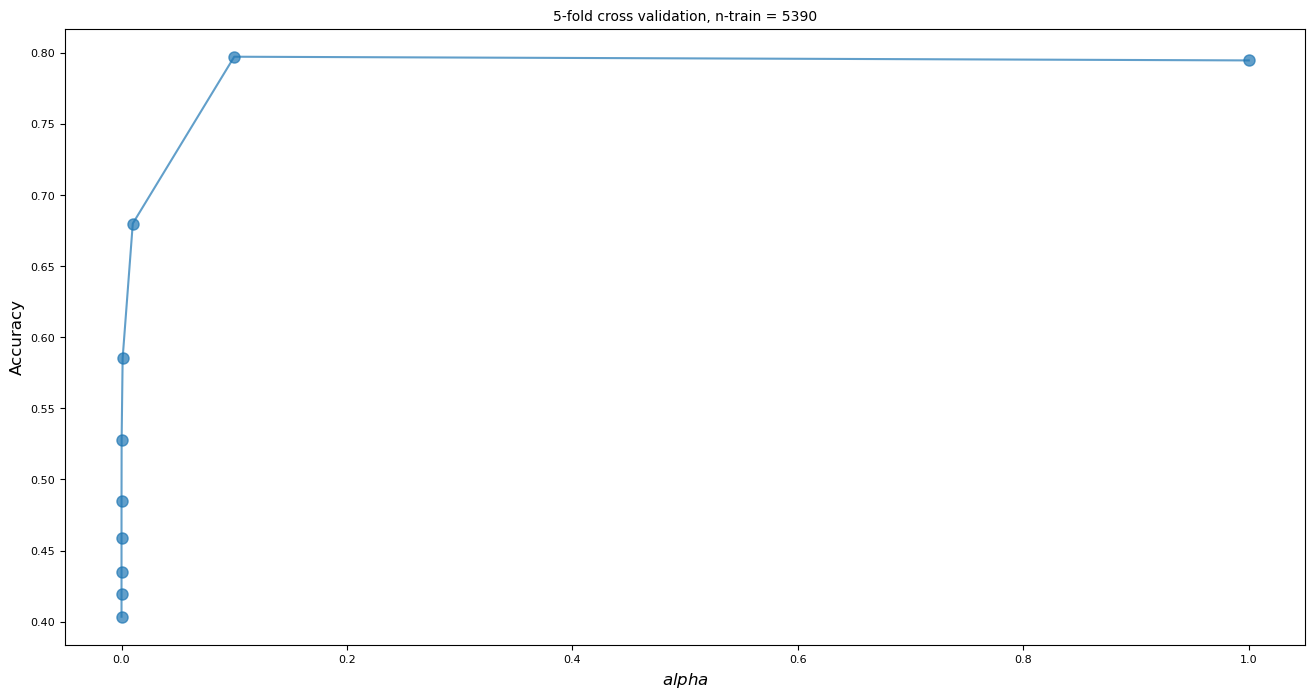

In [27]:
alphas = [1.0e-9, 1.0e-8, 1.0e-7, 1.0e-6, 1.0e-5, 1.0e-4, 1.0e-3, 1.0e-2, 1.0e-1, 1.0]
scores = []
c = 5

for a in alphas:
    clf = MultinomialNB(alpha=a)
    score = cross_val_score(clf, X_train, y_train, cv=c)
    scores.append(score.mean())
    
print(scores)

fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.tick_params(axis='both', which='major', labelsize=8)
plt.plot(alphas, scores, 'o-', markersize=8, alpha=.7)
# max_k = clf[np.argmax(scores)]
# plt.plot([max_k, max_k], [0, 1.0], color=colors[1])
plt.xlabel('$alpha$', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('{0:d}-fold cross validation, n-train = {1:d}'.format(c,X_train.shape[0]), fontsize=10)
plt.show()
